## 一、准备数据

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
#读取数据、合并数据
tr = pd.read_csv("D:\JupyterWork\广告点击率预测（kaggle比赛）\Train.csv")
te = pd.read_csv("D:\JupyterWork\广告点击率预测（kaggle比赛）\Test.csv")
tr_te = pd.concat([tr,te],axis=0,ignore_index=True)
tr_te.head()


,hour,device_connectiontype,publisher_id,province,city,device_osv_os,mtype,device_model_price,listing_date,device_make_name,...,olt,device_make_tag,device_model_tag,age,gender,city_grading,click,rmid,pure_date,id
0,18,2,45,13,46,0,7,2,2,4,...,2,9,870,5,1,2,0.0,47c98e8417a8e5e94fc840b8d7bd37a5,20220503,0
1,18,2,45,13,46,0,7,2,2,4,...,2,9,870,5,1,2,0.0,47c98e8417a8e5e94fc840b8d7bd37a5,20220503,1
2,18,2,45,13,46,0,7,2,2,4,...,2,9,870,5,1,2,0.0,47c98e8417a8e5e94fc840b8d7bd37a5,20220503,2
3,18,2,45,13,46,0,7,2,2,4,...,2,9,870,5,1,2,0.0,47c98e8417a8e5e94fc840b8d7bd37a5,20220503,3
4,18,2,45,13,46,0,7,2,2,4,...,2,9,870,5,1,2,0.0,47c98e8417a8e5e94fc840b8d7bd37a5,20220503,4


## 二、数据预处理

In [3]:
tr_te.info()  #查看列名、缺失情况、数据类型
tr_te.describe() #数值型特征描述统计

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367122 entries, 0 to 1367121
Data columns (total 89 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   hour                             1367122 non-null  int64  
 1   device_connectiontype            1367122 non-null  int64  
 2   publisher_id                     1367122 non-null  int64  
 3   province                         1367122 non-null  int64  
 4   city                             1367122 non-null  int64  
 5   device_osv_os                    1367122 non-null  int64  
 6   mtype                            1367122 non-null  int64  
 7   device_model_price               1367122 non-null  int64  
 8   listing_date                     1367122 non-null  int64  
 9   device_make_name                 1367122 non-null  int64  
 10  opera_system                     1367122 non-null  int64  
 11  rom_capacity                     1367122 non-null 

,hour,device_connectiontype,publisher_id,province,city,device_osv_os,mtype,device_model_price,listing_date,device_make_name,...,explorer_app,olt,device_make_tag,device_model_tag,age,gender,city_grading,click,pure_date,id
count,1.367122e+06,1.367122e+06,1.367122e+06,1.367122e+06,1.367122e+06,1.367122e+06,1.367122e+06,1.367122e+06,1.367122e+06,1.367122e+06,...,1.367122e+06,1.367122e+06,1.367122e+06,1.367122e+06,1.367122e+06,1.367122e+06,1.367122e+06,783984.000000,1.367122e+06,1.367122e+06
mean,1.431971e+01,2.271383e+00,2.689907e+01,1.283088e+01,6.221561e+01,2.371866e+01,3.573993e+00,3.106759e+00,1.614356e+00,2.828711e+00,...,1.454948e+00,1.038157e+00,1.297805e+01,3.226140e+02,1.468543e+00,7.553481e-01,2.079656e+00,0.030541,2.022049e+07,3.491566e+05
std,6.345977e+00,1.293216e+00,1.771944e+01,3.363771e+00,6.824030e+01,4.371977e+01,2.985859e+00,2.943275e+00,1.932047e+00,2.555697e+00,...,1.454826e+00,9.919661e-01,1.544924e+01,3.299650e+02,2.054030e+00,8.867765e-01,8.487520e-01,0.172072,3.053400e+01,2.095852e+05
min,1.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.022043e+07,0.000000e+00
25%,1.000000e+01,2.000000e+00,6.000000e+00,1.300000e+01,4.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,2.022050e+07,1.708900e+05
50%,1.500000e+01,2.000000e+00,1.700000e+01,1.300000e+01,4.600000e+01,9.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,...,1.000000e+00,2.000000e+00,6.000000e+00,2.180000e+02,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,2.022050e+07,3.417800e+05
75%,2.000000e+01,2.000000e+00,4.500000e+01,1.300000e+01,4.600000e+01,1.200000e+01,7.000000e+00,7.000000e+00,3.000000e+00,5.000000e+00,...,3.000000e+00,2.000000e+00,1.700000e+01,6.260000e+02,3.000000e+00,2.000000e+00,2.000000e+00,0.000000,2.022051e+07,5.126700e+05
max,2.400000e+01,7.000000e+00,4.500000e+01,3.000000e+01,5.850000e+02,1.560000e+02,1.500000e+01,9.000000e+00,6.000000e+00,1.200000e+01,...,3.000000e+00,3.000000e+00,5.400000e+01,9.610000e+02,6.000000e+00,3.000000e+00,6.000000e+00,1.000000,2.022051e+07,7.839830e+05


特征没有缺失值

### 数据编码

In [4]:
#列重命名
tr_te = tr_te.rename(columns={'pure_date': 'day'})
tr_te = tr_te.rename(columns={'click': 'isClick'})
tr_te = tr_te.rename(columns={'rmid': 'user_id'})

In [6]:
from sklearn import preprocessing

labelencoder =preprocessing.LabelEncoder()

tr_te['user_id'] = labelencoder.fit_transform(tr_te['user_id'])

tr_te['day'] = labelencoder.fit_transform(tr_te['day'])

### 类别变量编码

In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label = LabelEncoder()

# 法一：
tr_te['gender'] = label.fit_transform(tr_te['gender'])  #变成Female:0； male:1编码


## 数据探索

### 1.click的分布

<AxesSubplot:>

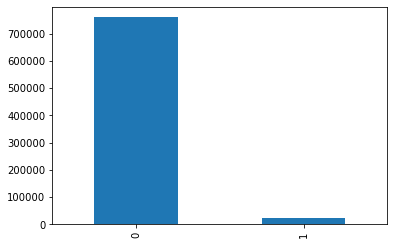

In [8]:
tr['click'].value_counts().plot(kind='bar')


click不均衡

### 2.uer_id出现频率的分布

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='user_id'>

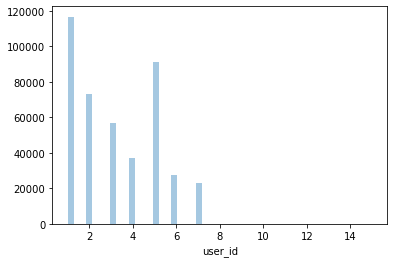

In [10]:
import seaborn as sns  #seaborn是在matplotlib的基础上进行了更高级的API封装；语法更简洁
sns.distplot(tr_te['user_id'].value_counts(),kde=False)  #对user_id计数作分布直方图；曲线为核密度估计（kde默认为True;改为False则绘制频数直方图）
#横坐标是各user_id的计数（series的value），纵坐标是具备对应横坐标计数的user_id个数(series的key个数)

每个用户重复出现的频率高

### 3.点击时间的分布

<AxesSubplot:>

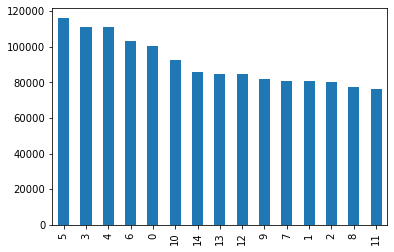

In [11]:
#每天的样本分布
tr_te['day'].value_counts().plot(kind='bar')

<AxesSubplot:>

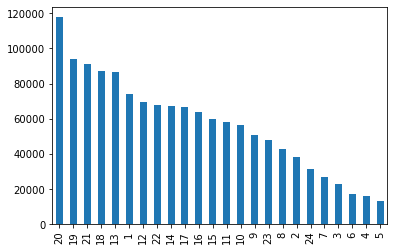

In [12]:
#每小时的样本分布
tr_te['hour'].value_counts().plot(kind='bar')  #傍晚7/8点最多，凌晨前后最少

### 3.不同平台的分布

<AxesSubplot:>

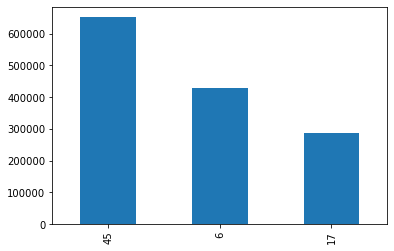

In [13]:
tr_te['publisher_id'].value_counts().plot(kind='bar') #不同平台的分布情况

<AxesSubplot:xlabel='publisher_id'>

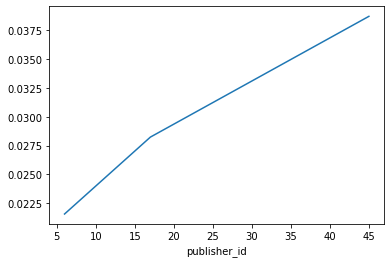

In [14]:
tr_te.loc[tr_te['isClick']!="NAN"].groupby('publisher_id')['isClick'].mean().plot()  #默认kind='line'

不同平台之间的点击率差异明显

<AxesSubplot:>

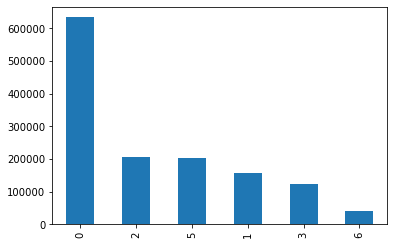

In [15]:
tr_te['listing_date'].value_counts().plot(kind='bar') #上市时间分布

<AxesSubplot:xlabel='sohu_activity'>

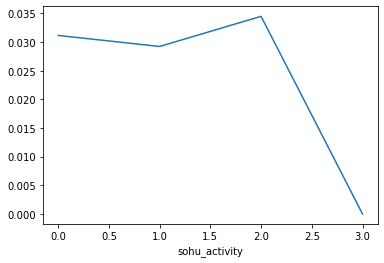

In [16]:
tr_te.loc[tr_te['isClick']!="NAN"].groupby('sohu_activity')['isClick'].mean().plot()  #默认kind='line'

## 绘制activity属性和click的关系图

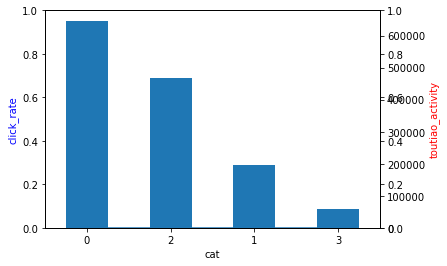

In [17]:
import matplotlib.pyplot as plt
for i in [ 'toutiao_activity']:
#        'kuaishou_activity', 'tencent_activity', 'weibo_activity',
#        'baidukaipingpd_activity', 'netease_activity', 'baidufeed_activity',
#        'iqiyi_activity', 'ximalaya_activity', 'vivo_activity', 'oppo_activity',
#        'imgotv_activity', 'youtu_activity', 'imgotvpd_activity',
#        'sohu_activity', 'meitu_activity', 'xiaomi_activity',
#        'youdaoyex_activity', 'funshion_activity', 'zhihu_activity']:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    #画类别/点击率的图
    ax1.set_xlabel("cat")
    ax1.set_ylabel("click_rate", color="b")
    tr_te.loc[tr_te['isClick']!="NAN"].groupby(i)['isClick'].mean().plot()  #默认kind='line'
    
    #画类别/数量的图
    ax2.set_xlabel("cat")
    ax2.set_ylabel(i, color="r")
    tr_te[i].loc[tr_te['isClick']!="NAN"].value_counts().plot(kind='bar') #上市时间分布
    ax2 = ax1.twinx()
    
#     plt.legend(loc='best')
    plt.show()

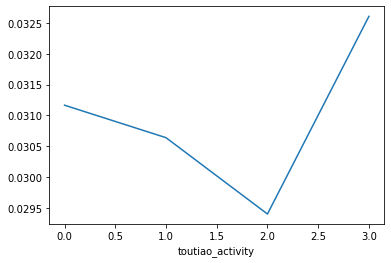

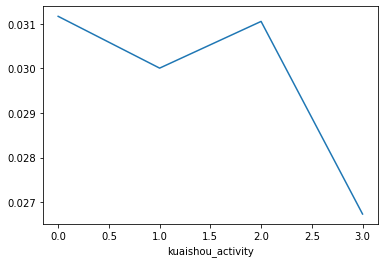

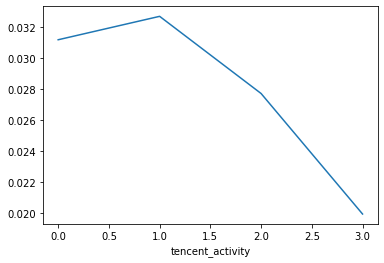

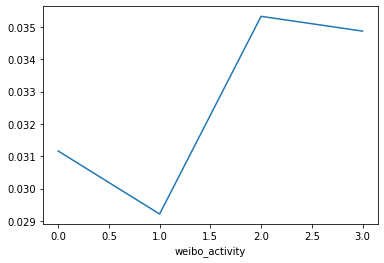

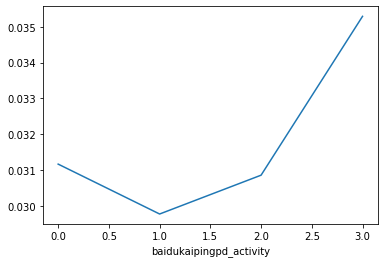

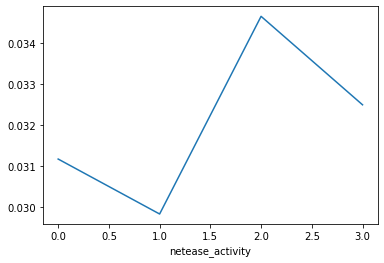

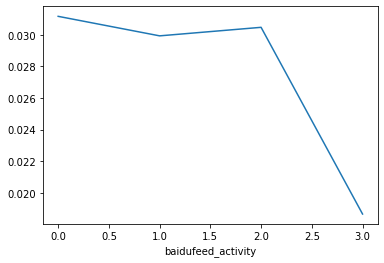

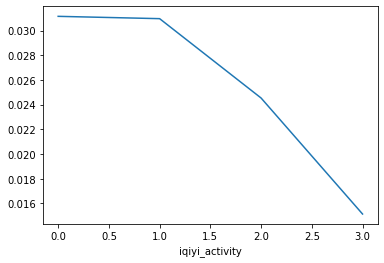

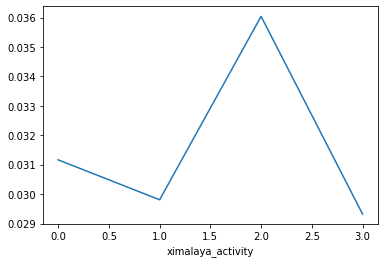

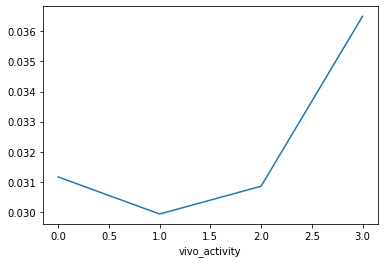

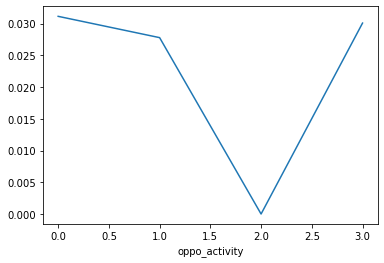

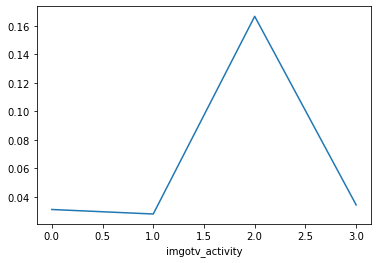

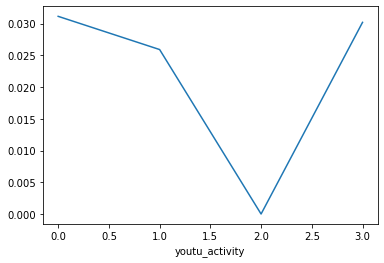

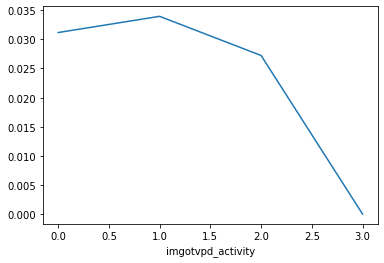

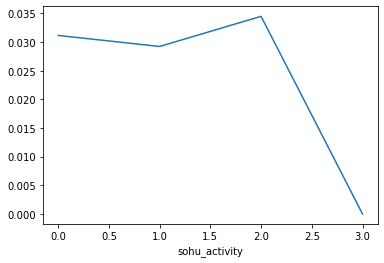

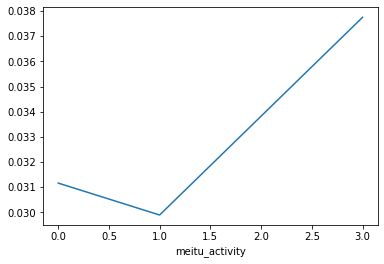

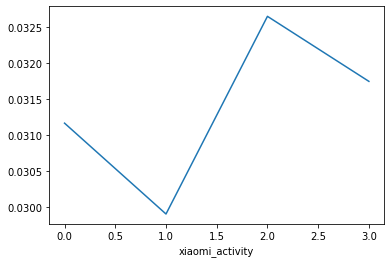

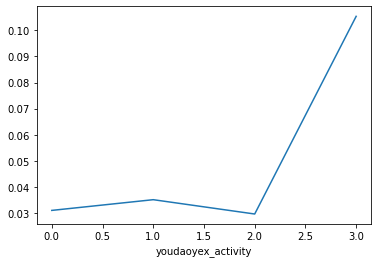

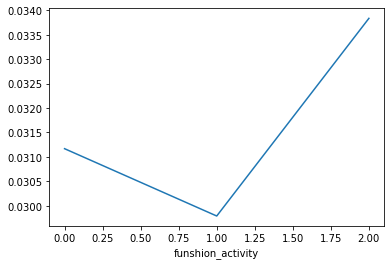

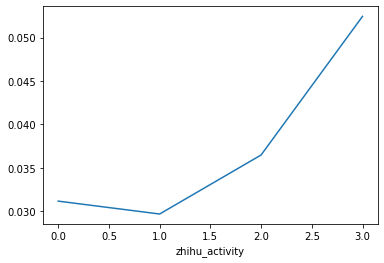

In [18]:
import matplotlib.pyplot as plt
for i in [ 'toutiao_activity',
       'kuaishou_activity', 'tencent_activity', 'weibo_activity',
       'baidukaipingpd_activity', 'netease_activity', 'baidufeed_activity',
       'iqiyi_activity', 'ximalaya_activity', 'vivo_activity', 'oppo_activity',
       'imgotv_activity', 'youtu_activity', 'imgotvpd_activity',
       'sohu_activity', 'meitu_activity', 'xiaomi_activity',
       'youdaoyex_activity', 'funshion_activity', 'zhihu_activity']:
    tr_te.loc[tr_te['isClick']!="NAN"].groupby(i)['isClick'].mean().plot()  #默认kind='line'
    plt.show()

1,可以看出0并非缺失值
2.接近0.3的都是大量出现的值,远离0.3的是出现频率低的值

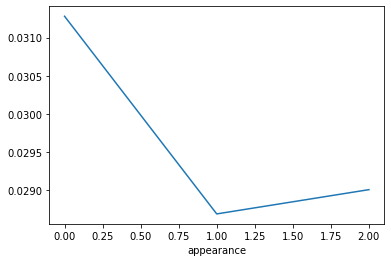

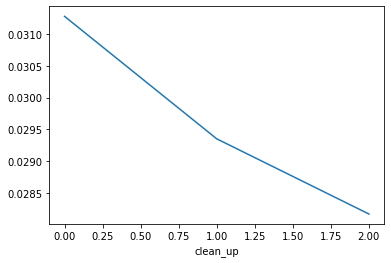

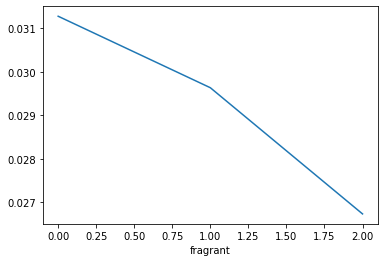

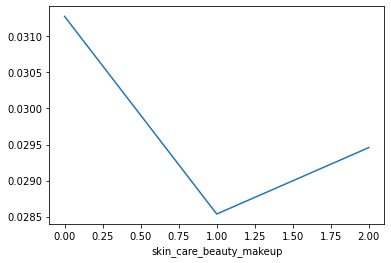

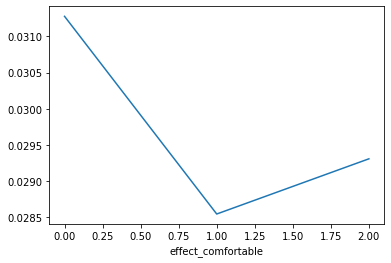

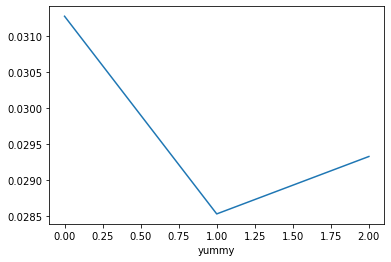

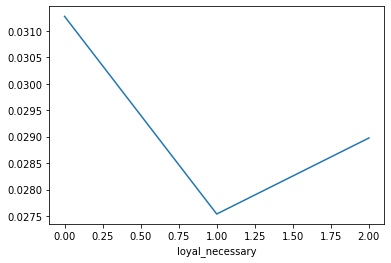

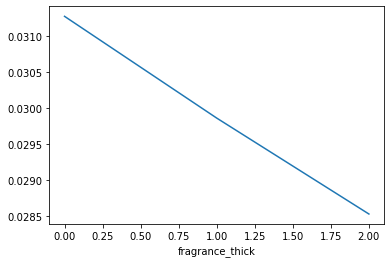

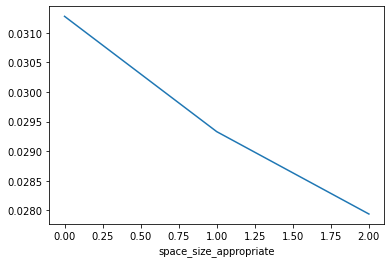

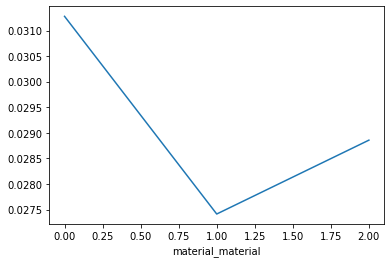

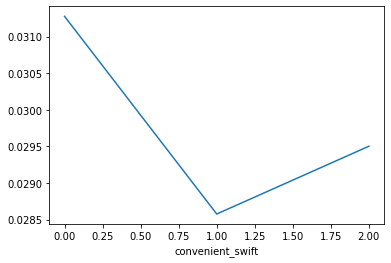

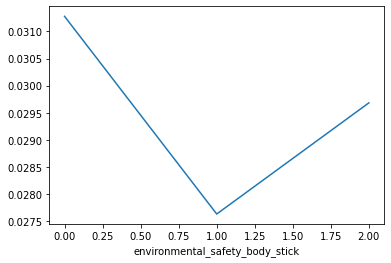

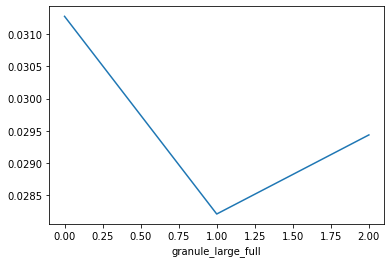

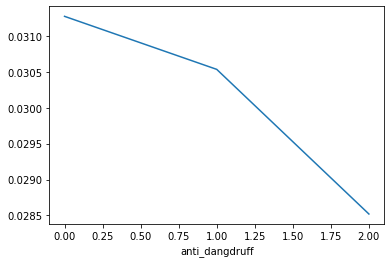

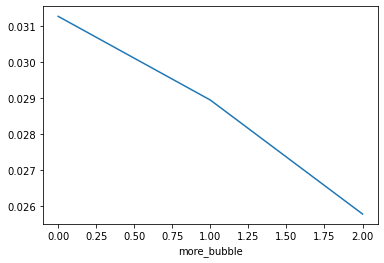

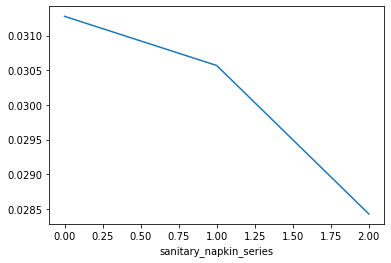

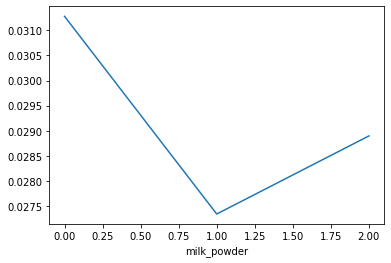

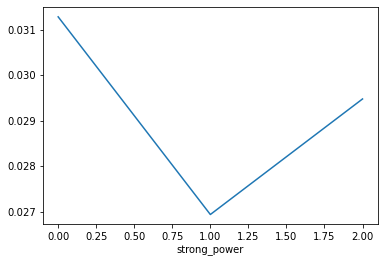

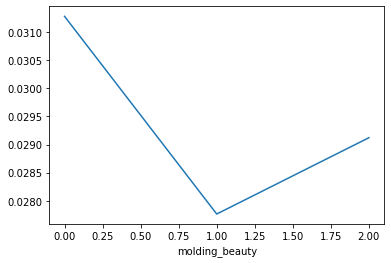

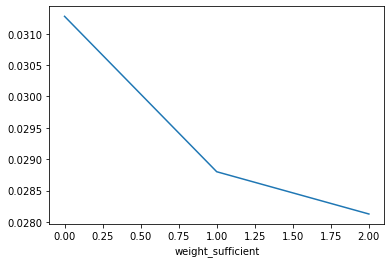

In [20]:
for i in ['appearance', 'clean_up', 'fragrant', 'skin_care_beauty_makeup', 'effect_comfortable',
       'yummy', 'loyal_necessary', 'fragrance_thick', 'space_size_appropriate',
       'material_material', 'convenient_swift',
       'environmental_safety_body_stick', 'granule_large_full',
       'anti_dangdruff', 'more_bubble', 'sanitary_napkin_series',
       'milk_powder', 'strong_power', 'molding_beauty', 'weight_sufficient']:
    tr_te.loc[tr_te['isClick']!="NAN"].groupby(i)['isClick'].mean().plot()  #默认kind='line'
    plt.show()

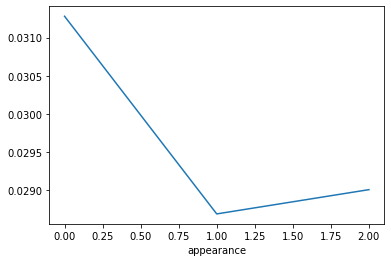

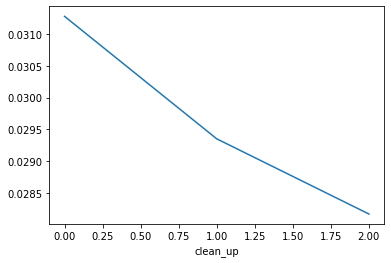

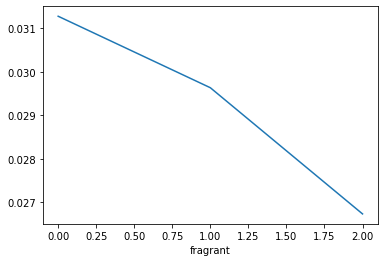

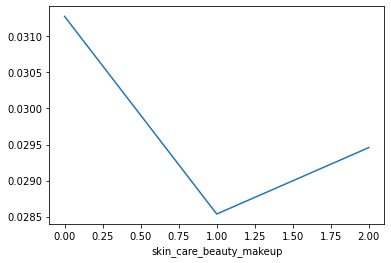

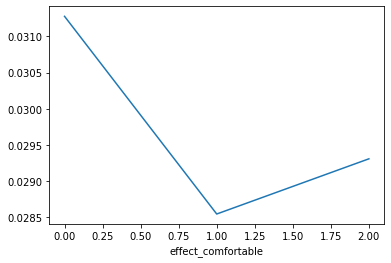

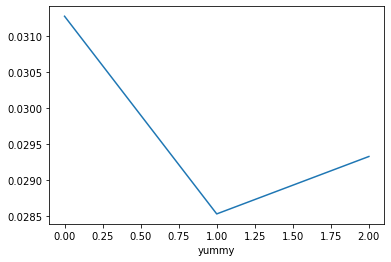

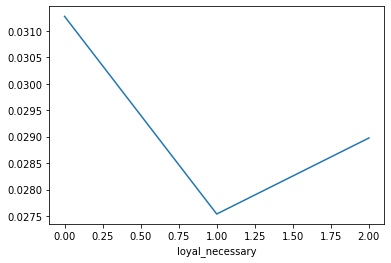

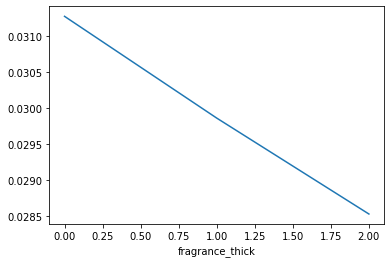

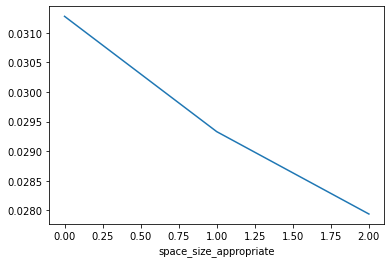

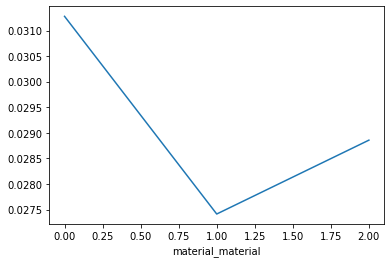

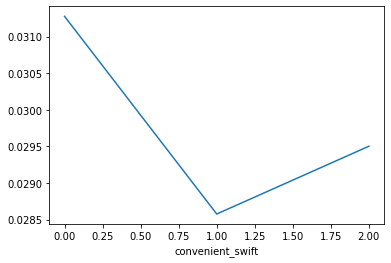

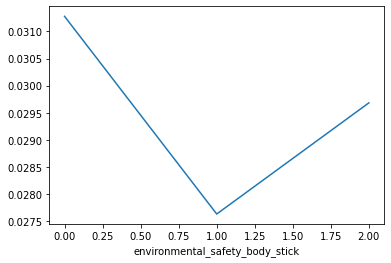

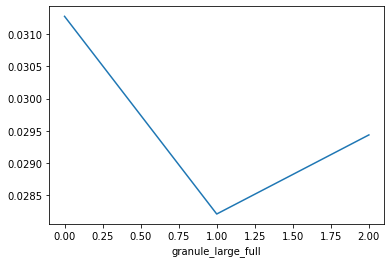

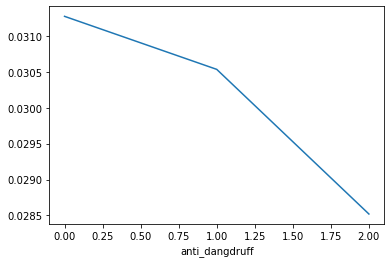

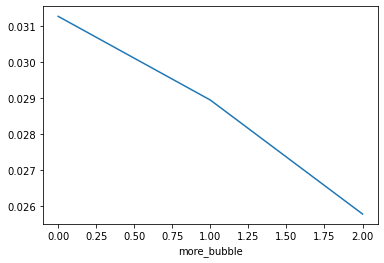

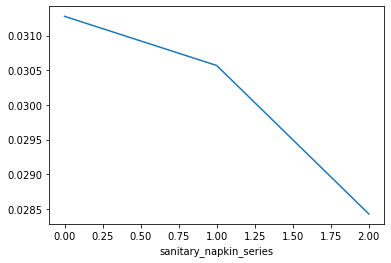

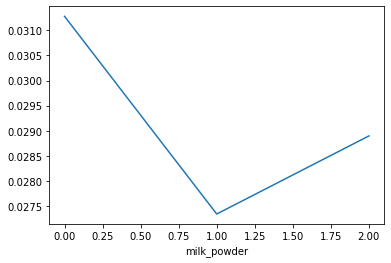

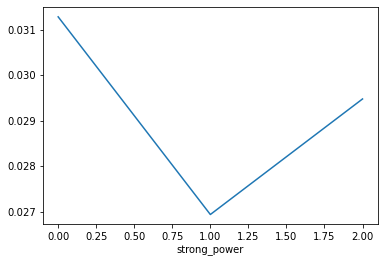

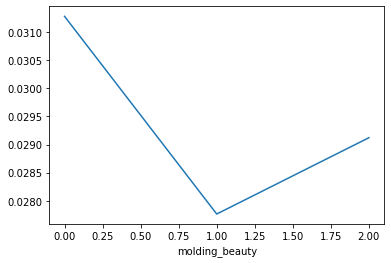

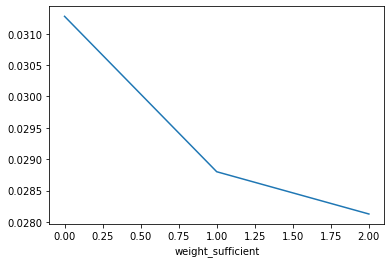

In [19]:
for i in ['appearance', 'clean_up', 'fragrant', 'skin_care_beauty_makeup', 'effect_comfortable',
       'yummy', 'loyal_necessary', 'fragrance_thick', 'space_size_appropriate',
       'material_material', 'convenient_swift',
       'environmental_safety_body_stick', 'granule_large_full',
       'anti_dangdruff', 'more_bubble', 'sanitary_napkin_series',
       'milk_powder', 'strong_power', 'molding_beauty', 'weight_sufficient']:
    tr_te.loc[tr_te['isClick']!="NAN"].groupby(i)['isClick'].mean().plot()  #默认kind='line'
    plt.show()

0也不是缺失值

In [21]:
tr_te.columns

Index(['hour', 'device_connectiontype', 'publisher_id', 'province', 'city',
       'device_osv_os', 'mtype', 'device_model_price', 'listing_date',
       'device_make_name', 'opera_system', 'rom_capacity', 'ram',
       'screen_size', 'screen_pixel_density', 'toutiao_activity',
       'kuaishou_activity', 'tencent_activity', 'weibo_activity',
       'baidukaipingpd_activity', 'netease_activity', 'baidufeed_activity',
       'iqiyi_activity', 'ximalaya_activity', 'vivo_activity', 'oppo_activity',
       'imgotv_activity', 'youtu_activity', 'imgotvpd_activity',
       'sohu_activity', 'meitu_activity', 'xiaomi_activity',
       'youdaoyex_activity', 'funshion_activity', 'zhihu_activity',
       'is_iqiyi_vip', 'is_tencent_vip', 'is_youtu_vip', 'lifestyle',
       'business_travel_industry', 'auto_media', 'music_industry',
       'resident_province', 'resident_city', 'resident_city_level',
       'resident_region', 'resident_province_gdp',
       'resident_province_gdp_upper', 'resident_c

<AxesSubplot:xlabel='day'>

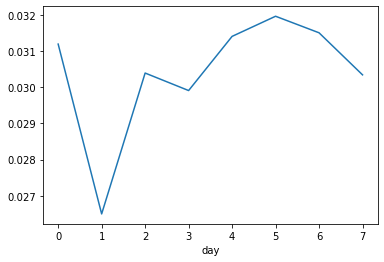

In [22]:
tr_te.loc[tr_te['isClick']!="NAN"].groupby('day')['isClick'].mean().plot()  #默认kind='line'

总体稳定在3%周围，某一天的点击率偏小，其他都在3%以上。

## 三、特征工程

In [30]:
# 查看各类别变量每个类别的平均点击率
no_features=["user_id","id","click"]
categorical_cols = [col for col in list(tr_te.select_dtypes('number').columns) if col !='float' and col not in no_features]
for x in categorical_cols:
    print(tr[[x,'click']].groupby(x,as_index=False).mean())
    print('-'*10, '\n')

    hour     click
0      1  0.021129
1      2  0.020459
2      3  0.020862
3      4  0.020254
4      5  0.019748
5      6  0.025296
6      7  0.025740
7      8  0.033961
8      9  0.030342
9     10  0.028954
10    11  0.026680
11    12  0.028483
12    13  0.031793
13    14  0.031610
14    15  0.029139
15    16  0.027791
16    17  0.028624
17    18  0.030139
18    19  0.033008
19    20  0.034568
20    21  0.036236
21    22  0.039897
22    23  0.043206
23    24  0.042816
---------- 

   device_connectiontype     click
0                      0  0.029117
1                      1  0.021739
2                      2  0.030559
3                      4  0.038831
4                      5  0.023513
5                      6  0.026759
6                      7  0.055556
---------- 

   publisher_id     click
0             6  0.021567
1            17  0.028243
2            45  0.038723
---------- 

    province     click
0          0  0.027923
1          1  0.021673
2          3  0.029973
3         

   lifestyle     click
0          0  0.031259
1          1  0.028720
2          2  0.027498
3          4  0.029283
4          5  0.025747
5          6  0.031577
6          7  0.026440
7          8  0.029401
---------- 

   business_travel_industry     click
0                         0  0.031032
1                         1  0.029948
2                         2  0.029208
---------- 

   auto_media     click
0           0  0.031347
1           1  0.028937
2           2  0.018587
---------- 

   music_industry     click
0               0  0.031347
1               1  0.028576
2               2  0.033929
---------- 

    resident_province     click
0                   0  0.030979
1                   1  0.036589
2                   2  0.041784
3                   3  0.035354
4                   4  0.038750
5                   6  0.031700
6                   7  0.035805
7                   8  0.035264
8                   9  0.041340
9                  10  0.033069
10                 11  0.0308

   city_grading     click
0             0  0.024094
1             1  0.030590
2             2  0.030744
3             3  0.032285
4             4  0.028219
5             5  0.035651
6             6  0.034633
---------- 



KeyError: "['isClick'] not in index"

可以看出，相关系数都不大，需要做进一步分析

In [31]:
#类别特征与目标变量的相关性
tr_te[['isClick']+categorical_cols].corr()


,isClick,hour,device_connectiontype,publisher_id,province,city,device_osv_os,mtype,device_model_price,listing_date,...,meteorological_traffic_app,explorer_app,olt,device_make_tag,device_model_tag,age,gender,city_grading,isClick,day
isClick,1.000000,0.027397,-0.001902,0.045002,0.001583,0.001841,-0.004615,0.015567,0.005537,0.015354,...,-0.003834,-0.002711,-0.003855,0.013537,0.006914,-0.002100,-0.003636,0.007272,1.000000,0.003760
hour,0.027397,1.000000,-0.023075,0.206680,-0.009873,-0.035442,0.027221,0.018985,0.041618,0.040180,...,0.028623,0.032928,0.027779,0.037937,0.046750,0.010639,0.021627,-0.024770,0.027397,0.103773
device_connectiontype,-0.001902,-0.023075,1.000000,-0.170159,-0.038546,0.071911,-0.022206,-0.076239,0.030866,0.028752,...,0.056769,0.044488,0.062458,0.048711,0.019962,0.071503,0.054661,0.003287,-0.001902,-0.049431
publisher_id,0.045002,0.206680,-0.170159,1.000000,-0.037234,-0.099949,0.112414,0.161585,0.239503,0.279145,...,0.085855,0.105192,0.087190,0.245656,0.268159,0.057465,0.057923,-0.018518,0.045002,0.052353
province,0.001583,-0.009873,-0.038546,-0.037234,1.000000,0.228507,0.000308,0.006351,-0.013290,-0.010339,...,-0.009627,-0.006870,-0.008954,-0.017631,-0.008986,-0.010262,-0.003833,0.431822,0.001583,0.001127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
age,-0.002100,0.010639,0.071503,0.057465,-0.010262,-0.014728,0.119072,-0.369580,0.323858,0.307055,...,0.642566,0.628575,0.669095,0.246833,0.308887,1.000000,0.715169,-0.017805,-0.002100,-0.003789
gender,-0.003636,0.021627,0.054661,0.057923,-0.003833,-0.025478,0.184172,-0.443655,0.378232,0.311316,...,0.773397,0.754569,0.795957,0.258107,0.358935,0.715169,1.000000,-0.023881,-0.003636,-0.003779
city_grading,0.007272,-0.024770,0.003287,-0.018518,0.431822,0.725135,-0.013063,0.057569,0.013586,0.018915,...,-0.033293,-0.031609,-0.033928,0.013136,0.003050,-0.017805,-0.023881,1.000000,0.007272,0.028181
isClick,1.000000,0.027397,-0.001902,0.045002,0.001583,0.001841,-0.004615,0.015567,0.005537,0.015354,...,-0.003834,-0.002711,-0.003855,0.013537,0.006914,-0.002100,-0.003636,0.007272,1.000000,0.003760


一般先从活动特征、商品历史特征、时间序列特征下手。活动特征是外部导致（外部特征导致，一般来源于业务本身）、商品历史特征（统计比例、权重设置，这个主要靠想象）、时间序列特征（可以做的处理比较多）。

## 新增活跃/非活跃特征
考虑到user_id为有偏分布，可对出现user_id的次数小于等于4的归一类，其他归为另一类，新增非活跃/活跃的特征。

<AxesSubplot:xlabel='user_id'>

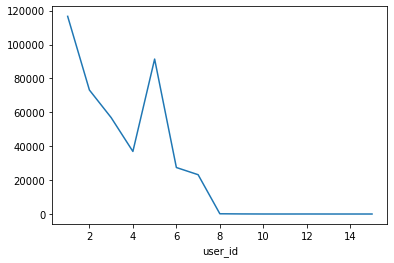

In [33]:
# 对user_id计数小于等于3的归为1类
df_te = tr_te['user_id'].value_counts().reset_index()  
# value_counts()聚合之后，变成了series；reset_index()后将series变成数据框, 同时把原先的索引保留：
df_te.groupby('user_id')['index'].count().plot()
#这里的rmid已经不是tr_te中的rmid了，这里是对每个用户出现次数的统计结果


个体出现的频率集中在0-7之间，高于8的较少

In [40]:
lis_thr = df_te[df_te['user_id']<=4]['index'].unique().tolist()  #取user_id小于等于4的样本index的不重复值
tr_te['thr'] = np.where(tr_te['user_id'].isin(lis_thr),0,1)  #小于等于3的赋值0，否则赋值1，新增为一列

## 新增用户和用户在页面的历史点击率特征
#### 历史点击率大的人/页面说明点击的可能性越大
#### 分析并最终得到每个user_id和用户在页面某一date（day）的前window_size的历史平均点击率，并增补到原数据的列中。

In [41]:
from tqdm import tqdm  

#统计每个f在前window_size天的平均点击率
#定义函数
def his_clickrate(df,f,window_size):
    fea_name = "{}_his_{}_clickrate".format(f,window_size)
    df[fea_name]=0   #day=0的前window_size天历史点击率为0，其余时间的待更新
    for i in tqdm(range(3,8)):  #这里的day是0~14，所以才有range(1,15)
        df_front = df.loc[(df['day'].values.astype(np.int16) >= i-window_size) & (df['day'].values.astype(np.int16) < i)]   #取当前i下的前window_size天数据
        inds = (df['day']==i)  #判断当前行的日期是否为i，作为行索引
        df.loc[inds,fea_name] = df.loc[inds,f].map(df_front.groupby(f)['isClick'].mean())  #根据user_id来新增了一列映射，并命名fea_name
    return df

In [42]:
tr_te = his_clickrate(df=tr_te, f='user_id', window_size=2)  #统计每个用户id在前2天的平均点击率

# tr_te['user_id_webpage_id'] = [str(i)+str(j) for i,j in zip(tr_te['user_id'],tr_te[''])]
# tr_te = his_clickrate(df=tr_te, f='user_id_webpage_id', window_size=2)  #统计每个用户在每个页面前2天的平均点击率

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.82it/s]


## 新增用户在产品上的3天移动平均点击率特征
使用滑动窗口函数rolling(window)

向下平移一格 --shift(a) ,shift(-a) --表示向上平移，且数字可以改变，a 表示a个单位

In [43]:
tr_te.columns

Index(['hour', 'device_connectiontype', 'publisher_id', 'province', 'city',
       'device_osv_os', 'mtype', 'device_model_price', 'listing_date',
       'device_make_name', 'opera_system', 'rom_capacity', 'ram',
       'screen_size', 'screen_pixel_density', 'toutiao_activity',
       'kuaishou_activity', 'tencent_activity', 'weibo_activity',
       'baidukaipingpd_activity', 'netease_activity', 'baidufeed_activity',
       'iqiyi_activity', 'ximalaya_activity', 'vivo_activity', 'oppo_activity',
       'imgotv_activity', 'youtu_activity', 'imgotvpd_activity',
       'sohu_activity', 'meitu_activity', 'xiaomi_activity',
       'youdaoyex_activity', 'funshion_activity', 'zhihu_activity',
       'is_iqiyi_vip', 'is_tencent_vip', 'is_youtu_vip', 'lifestyle',
       'business_travel_industry', 'auto_media', 'music_industry',
       'resident_province', 'resident_city', 'resident_city_level',
       'resident_region', 'resident_province_gdp',
       'resident_province_gdp_upper', 'resident_c

In [44]:
tr_te['user_publisher_id_3day_mean'] = tr_te.groupby(['user_id','publisher_id','day'])['isClick'].transform(lambda x: x.rolling(3).mean().shift(1))  #transform新增一列
#shift(1)：向下平移一格，使用过去历史的3天数据计算均值
#用时大于2min

In [45]:
tr_te['user_publisher_id_3day_mean']

0          NaN
1          NaN
2          NaN
3          0.0
4          0.0
          ... 
1367117    NaN
1367118    NaN
1367119    NaN
1367120    NaN
1367121    NaN
Name: user_publisher_id_3day_mean, Length: 1367122, dtype: float64

In [53]:
# 处理窗口滑动产生的缺失值(在特征筛选阶段发现，该特征存在缺失值，故返回增加此缺失值处理，否则Lasso特征筛选时就报错了)
tr_te['user_publisher_id_3day_mean'].fillna(0, inplace=True)

## 其他特征处理:填补gender空缺值，对日期day做分类替换。

In [54]:
#设置显示全部行，不省略
pd.set_option('display.max_rows',None)
#设置显示全部列，不省略
pd.set_option('display.max_columns',None)


In [55]:
# 星期数据替换, 主要将周五、周六、周天归为一类(周二、三、四归为一类)
tr_te['xingqi'] = tr_te['day'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1])

## 单变量特征计数和双变量组合特征计数

In [56]:
from itertools import combinations,permutations  #导入组合、全排列迭代器

In [57]:
lis = ['user_id',"publisher_id",'gender', 'age', 'day', 'hour']
# 新增单特征计数 所有id

for i in lis:
    tr_te[i+'cnt'] = tr_te.groupby(i)['id'].transform('count')

# 新增双特征计数
# list(combinations(lis,2))  #组合
#itertools.permutations(lis,2):会报错name 'itertools' is not defined；若想用此表达，导入时应改为import itertools
for j in list(permutations(lis,2)):  #全排列
    tr_te[j[0]+'_'+j[1]+'_cnt'] = tr_te.groupby(list(j))['id'].transform('count')  #groupby时，哪个特征先，哪个特征后，分组count结果具有不同意义，因此采用全排列


### 时间序列特征：计算时间差。
同一个用户同一天同一小时，行为时间的极值； 2. 同一个用户同一天，行为时间的极值； 3. 同一用户的行为时间一阶差分


In [58]:
pure_date=pd.read_csv("D:\JupyterWork\广告点击率预测（kaggle比赛）\Train.csv")["pure_date"]
pure_date.head()

0    20220503
1    20220503
2    20220503
3    20220503
4    20220503
Name: pure_date, dtype: int64

In [59]:
pure_date=pure_date.astype("str")

In [60]:
# 由于pd.to_datetime()需要传入的参数必须包含年月日，否则转换之后得不到想要的日期格式，因此先给date字段前拼接'2021-'(猜测，不是也没关系)，便于后面计算时间差
#20020319
# for i in range(7):
#     print(str(i)+":"+pure_date[i])

tr_te['date']=0
flag = 0
for i in pure_date:
    i = str(i)
    date = i[0:4]+"-"+i[4:6]+"-"+i[6:8]
    tr_te['date'][flag] = date
    flag+=1
#     tr_te['date'] = pd.to_datetime(tr_te['date'])


# res=[]
# pure = [20020319,20020306]
# # flag = 0
# for i in pure:
#     i = str(i)
#     date = i[0:4]+"-"+i[4:6]+"-"+i[6:8]
# #     print(flag)
#     res.append(date)
#     flag+=1
# #     res= pd.to_datetime(tr_te['date'])
# res

C:\Users\Lovia\AppData\Local\Temp/ipykernel_13260/4059327709.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr_te['date'][flag] = date
D:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [61]:
tr_te['date'].head()

0    2022-05-03
1    2022-05-03
2    2022-05-03
3    2022-05-03
4    2022-05-03
Name: date, dtype: object

In [62]:
tr_te['date'] = pd.to_datetime(tr_te['date'])

计算按用户、day、hour分组的组内时间极差，单位秒

计算按用户、day分组的组内时间极差，单位秒

In [64]:
tr_te['user_time_hour'] = tr_te.groupby(['user_id', 'day', 'hour'])['date'].transform(lambda x: (x.max()-x.min()).total_seconds())
tr_te['user_time_day'] = tr_te.groupby(['user_id', 'day'])['date'].transform(lambda x: (x.max()-x.min()).total_seconds())

In [65]:
# 按用户对date（前减后）一阶差分
tr_te['user_time_del'] = tr_te.groupby('user_id')['date'].transform(lambda x: x.diff(periods=-1))
tr_te['user_time_del'] = tr_te['user_time_del'].apply(lambda x: x.total_seconds())  #用apply()可以替换原列；不用apply直接重新赋值也可以
#处理缺失值（特征筛选时Lasso模型训练时出错，发现是该特征存在缺失值，故返回增加此处理）
tr_te['user_time_del'].fillna(0, inplace=True)

## 用户对广告的点击率权重特征（活动特征）¶
同个广告，越往后同一用户的点击率越小。即广告出现的次数和它此次被点击的概率应该成反比, 所以构造权重特征。

In [66]:
# 统计按发布者分组的数量
tr_te['user_id_publisher_id'] = tr_te.groupby(['user_id', 'publisher_id'])['id'].transform('count')

# 模拟出点击权重的反比变化（时间早晚排序）

# # 产品按用户、天的权重
# tr_te['user_id_day_product_range'] = tr_te.groupby(['user_id', 'day'])['product'].transform(lambda x: len(x) / np.array(range(1,len(x)+1)))  #要加np.array否则报错，range（python的内置函数）对象不能被除
# # # 产品按用户的权重
# tr_te['user_id_product_range'] = tr_te.groupby('user_id')['product'].transform(lambda x: len(x) / np.array(range(1,len(x)+1)))

# # 网页按用户、产品的权重
# tr_te['user_id_product_webpage_range'] = tr_te.groupby(['user_id', 'product'])['webpage_id'].transform(lambda x: len(x) / np.array(range(1,len(x)+1)))
# # 网页按用户、活动的权重
# tr_te['user_id_campaign_webpage_range'] = tr_te.groupby(['user_id', 'campaign_id'])['webpage_id'].transform(lambda x: len(x) / np.array(range(1,len(x)+1)))

根据某些字段，对按用户、天、小时的时间差特征进行均值、求和的时序特征扩展

In [67]:
lis_1 = ['user_id', 'gender', 'age',"publisher_id" ]
for i in lis_1:
    # 求均值
    tr_te[i + '_user_time_hour_mean'] = tr_te.groupby(i)['user_time_hour'].transform('mean')
    tr_te[i + '_user_time_day_mean'] = tr_te.groupby(i)['user_time_day'].transform('mean')
    # 求和
    tr_te[i + '_user_time_hour_sum'] = tr_te.groupby(i)['user_time_hour'].transform('sum')
    tr_te[i + '_user_time_day_sum'] = tr_te.groupby(i)['user_time_day'].transform('sum')

## 增加组合特征的时序特征统计值

In [68]:
# 按性别、年龄、产品类别分组，对用户时间差求均值即平均用时
tr_te['gender_age_product_user_time_hour_mean'] = tr_te.groupby(['gender', 'age'])['user_time_hour'].transform('mean')

In [69]:
# 暴力增加2个特征组合的用户平均用时
lis_1_it = list(permutations(lis_1, 2))
for c in lis_1_it:
    tr_te[c[0]+c[1]+'_user_time_hour_mean'] = tr_te.groupby(list(c))['user_time_hour'].transform('mean')


## 增加用户每天在产品、活动、网页、产品类别上的类别统计

In [71]:
#统计每一天的...
for j in ["publisher_id"]:
    #nunique计数
    tr_te['day_'+j+'_nunique'] = tr_te.groupby(['user_id', 'day'])[j].transform('nunique')
    #计算用户每天在发布者特征上的每种类别取值下平均有多少记录数；也可以尝试分子分母颠倒的特征（代表类别密度）
    tr_te['day_'+j+'_nunique_p'] = tr_te['user_id_day_cnt'] / tr_te['day_'+j+'_nunique']
    
# #统计每个用户每天每个小时的网页类别统计
# tr_te['day_hour_webpage_nunique'] = tr_te.groupby(['user_id', 'day', 'hour'])['webpage_id'].transform('nunique')

# 特征筛选

In [72]:
import pandas as pd
tr_te=pd.read_csv("730.csv")

FileNotFoundError: [Errno 2] No such file or directory: '730.csv'

In [2]:
tr_te["user_publisher_id_3day_mean"].fillna(-1)

0        -1.0
1        -1.0
2        -1.0
3         0.0
4         0.0
         ... 
150180   -1.0
150181   -1.0
150182   -1.0
150183    0.0
150184    0.0
Name: user_publisher_id_3day_mean, Length: 150185, dtype: float64

In [3]:
# 建模不需要的特征（是一些非数值型）：已进行特征工程转换为其他数值型特征
no_features  = ['id','isClick','date','user_id','publisher_id','age','hour','day','user_id_publisher_id','user_publisher_id_3day_mean']
# 建模需要的特征（均是数值型/等级数据）
features = [i for i in tr_te.columns if i not in no_features]

用Lasso进行特征筛选：

L1正则化将系数w的l1范数作为惩罚项加到损失函数上，由于正则项非零，这就迫使那些弱的特征所对应的系数变成0。因此L1正则化往往会使学到的模型很稀疏（系数w经常为0），这个特性使得L1正则化成为一种很好的特征选择方法。

Scikit-learn为线性回归提供了Lasso，为分类提供了L1逻辑回归。

In [4]:
# 导入一些库
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso


In [50]:
print(1)

1


In [5]:
tr_te.drop(columns=['user_publisher_id_3day_mean'])

,Unnamed: 0,hour,device_connectiontype,publisher_id,province,city,device_osv_os,mtype,device_model_price,listing_date,...,genderage_user_time_hour_mean,genderpublisher_id_user_time_hour_mean,ageuser_id_user_time_hour_mean,agegender_user_time_hour_mean,agepublisher_id_user_time_hour_mean,publisher_iduser_id_user_time_hour_mean,publisher_idgender_user_time_hour_mean,publisher_idage_user_time_hour_mean,day_publisher_id_nunique,day_publisher_id_nunique_p
0,0,18,2,45,13,46,0,7,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
1,1,18,2,45,13,46,0,7,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
2,2,18,2,45,13,46,0,7,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
3,3,18,2,45,13,46,0,7,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
4,4,18,2,45,13,46,0,7,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150180,150180,20,2,6,13,46,11,1,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
150181,150181,20,2,6,13,46,11,1,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
150182,150182,20,2,6,13,46,11,1,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0
150183,150183,20,2,6,13,46,11,1,7,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5.0


In [6]:
tr_te['isClick'] = tr_te['isClick'].fillna(-1)


In [7]:
# 准备数据集
test= tr_te[tr_te['isClick']==1]
train= tr_te[tr_te['isClick']!=-1]
 
x_train = train[features]
x_test = test[features]
y_train = train['isClick']

# print("Lasso model: ", pretty_print_linear(lasso.coef_, names, sort = True))

由于我们的数据集需要预先规范化，我们可以利用 scikit-learn 中强大的 Pipeline 对象将 StandardScaler 和 Lasso 对象封装成一个管线。

In [8]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()), #标准化
                     ('model',Lasso())#
])

然后是设置 Lasso 回归的α超参数（正则系数）。对于这个例子，我们将以0.1步长测试从0.1 到 10的几个值。

对于每个值，我们在5折交叉验证中计算均方误差的平均值，并选择最小化此类平均性能指标的α 值。为此，我们可以使用 GridSearchCV 对象。

In [10]:
# 'model__alpha':np.arange(0.1,10,0.1) 用时太久
# [0.1,1,5,10]结果是0.1最优，因此重新尝试[0.01,0.05,0.1]
search = GridSearchCV(
    pipeline,
    param_grid={'model__alpha':[0.0005,1,5,10]}, 
                      
    cv=3, 
                      
    scoring='neg_mean_squared_error', 
                      
    verbose=3)
# 注意scoring=="neg_mean_squared_error", 均方误差为负是因为sklearn在计算模型评估指标的时，认为均方误差本身是一种误差，是模型的一种损失(loss)。在sklearn当中，所有的损失都使用负数表示，因此均方误差也被显示为负数了。
# 这里使用 neg_mean_squared_error，因为网格搜索试图最大化性能指标，所以我们添加了一个减号来最小化均方误差。
# verbose：日志冗长度 

'model__alpha':[0.01,0.05,0.1]，α值可以很小，α值越小惩罚力度越小，保留的特征数量过多，达不到特征筛选的目的，因此适当选取α值

In [11]:
#设置显示全部行，不省略
pd.set_option('display.max_rows',None)
#设置显示全部列，不省略
pd.set_option('display.max_columns',None)
print(tr_te.isnull().any())

Unnamed: 0                                 False
hour                                       False
device_connectiontype                      False
publisher_id                               False
province                                   False
city                                       False
device_osv_os                              False
mtype                                      False
device_model_price                         False
listing_date                               False
device_make_name                           False
opera_system                               False
rom_capacity                               False
ram                                        False
screen_size                                False
screen_pixel_density                       False
toutiao_activity                           False
kuaishou_activity                          False
tencent_activity                           False
weibo_activity                             False
baidukaipingpd_activ

In [12]:
tr_te.isnull().any()

Unnamed: 0                                 False
hour                                       False
device_connectiontype                      False
publisher_id                               False
province                                   False
city                                       False
device_osv_os                              False
mtype                                      False
device_model_price                         False
listing_date                               False
device_make_name                           False
opera_system                               False
rom_capacity                               False
ram                                        False
screen_size                                False
screen_pixel_density                       False
toutiao_activity                           False
kuaishou_activity                          False
tencent_activity                           False
weibo_activity                             False
baidukaipingpd_activ

In [13]:
search.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ..............model__alpha=0.0005;, score=-0.029 total time=   1.5s
[CV 2/3] END ..............model__alpha=0.0005;, score=-0.029 total time=   1.8s
[CV 3/3] END ..............model__alpha=0.0005;, score=-0.030 total time=   1.5s
[CV 1/3] END ...................model__alpha=1;, score=-0.029 total time=   1.0s
[CV 2/3] END ...................model__alpha=1;, score=-0.029 total time=   1.0s
[CV 3/3] END ...................model__alpha=1;, score=-0.030 total time=   1.0s
[CV 1/3] END ...................model__alpha=5;, score=-0.029 total time=   1.0s
[CV 2/3] END ...................model__alpha=5;, score=-0.029 total time=   1.0s
[CV 3/3] END ...................model__alpha=5;, score=-0.030 total time=   1.0s
[CV 1/3] END ..................model__alpha=10;, score=-0.029 total time=   1.0s
[CV 2/3] END ..................model__alpha=10;, score=-0.029 total time=   1.0s
[CV 3/3] END ..................model__alpha=10;, 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [0.0005, 1, 5, 10]},
             scoring='neg_mean_squared_error', verbose=3)

In [15]:
import numpy as np

In [16]:
# 查看最优α下的 Lasso 回归的系数值
coef = search.best_estimator_.named_steps['model'].coef_

# 一个特征的重要性是它的系数的绝对值，即
importance = np.abs(coef)
importance


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.52694619e-04, 7.01720643e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.86945037e-03,
       1.60086243e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.01720332e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.53205973e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.64000481e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.01796962e-04, 2.72974244e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.46644895e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [17]:
# 最优超参数α值
search.best_params_

{'model__alpha': 0.0005}

In [18]:
import numpy as np
# 有些特征的重要性为 0。这些特征已被我们的模型丢弃，它们是:
out_features = list(np.array(features)[importance == 0])
# 在 Lasso 回归中幸存下来的特征是：
final_features = list(np.array(features)[importance > 0])

In [19]:
final_features

['device_osv_os',
 'mtype',
 'ram',
 'screen_size',
 'tencent_activity',
 'iqiyi_activity',
 'imgotv_activity',
 'is_youtu_vip',
 'lifestyle',
 'resident_province_gdp_upper',
 'space_size_appropriate',
 'device_make_tag',
 'city_grading',
 'xingqi',
 'user_idcnt',
 'publisher_idcnt',
 'daycnt',
 'hourcnt',
 'user_id_gender_cnt',
 'user_id_hour_cnt',
 'publisher_id_hour_cnt',
 'day_publisher_id_cnt',
 'hour_publisher_id_cnt']

In [ ]:
df_tr_te = tr_te

In [ ]:
df_tr_te = df_tr_te.rename(columns={ 'day':'pure_date'})
df_tr_te = df_tr_te.rename(columns={'isClick':'click'})
df_tr_te = df_tr_te.rename(columns={'user_id':'rmid'})
df_tr_te['click'] = df_tr_te['click'].fillna(-1)

In [ ]:
from sklearn import preprocessing

labelencoder =preprocessing.LabelEncoder()

# tr_te['rmid'] = labelencoder.fit_transform(tr_te['rmid'])

df_tr_te['pure_date'] = labelencoder.fit_transform(df_tr_te['pure_date'])

In [ ]:
# 星期数据替换, 主要将周五、周六、周天归为一类(周二、三、四归为一类)
df_tr_te['xingqi'] = df_tr_te['pure_date'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],[0,0,1,1,1,1,1,0,0,0,1,0,0,0,0])

In [ ]:
#切分出训练集
df_tr = df_tr_te.loc[ df_tr_te['click']!=-1]
df_tr.head()

In [ ]:
#切分出测试集
df_te = df_tr_te.loc[ df_tr_te['click']==-1]
df_te.head()

In [ ]:
x = df_tr_te.loc[ df_tr_te['click']!=-1].drop(columns= 'click')
x = x.drop(columns='id')
y = df_te['click']

In [ ]:
x = pd.DataFrame(x,columns=x.columns)
y = pd.DataFrame(y)
y = y.values.ravel()

In [ ]:
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import KFold 
import lightgbm as lgbm 

In [ ]:
cate_features  = [
    'mtype',
 'ram',
 'tencent_activity',
 'iqiyi_activity',
 'is_youtu_vip',
 'device_make_tag',
 'city_grading',
#  'xingqi'  #不好
                 ]
dense_features = ['publisher_idcnt',
 'user_id_hour_cnt',  #需保留
#  'publisher_id_hour_cnt',  #不好
 'hour_publisher_id_cnt']
label = 'click'

In [ ]:
df_tr_te.columns

In [ ]:
lgb_params = {
      "objective": "binary", 
      "metric": "auc", 
      "boosting_type": "gbdt",
      'early_stopping_rounds': 100,
      'learning_rate': 0.01,  
      'colsample_bytree':0.95, 
}
features = cate_features + dense_features
X_tr_val = df_tr_te.loc[df_tr_te['click']!=-1] 
X_te     = df_tr_te.loc[df_tr_te['click']==-1][features]
 
kf = KFold(n_splits=5)
lgb_models = []
y_pred = 0
for f,(tr_ind,val_ind) in enumerate(kf.split(X_tr_val)):
    
    X_train,X_valid = X_tr_val.iloc[tr_ind][features], X_tr_val.iloc[val_ind][features]
    y_train,y_valid = X_tr_val.iloc[tr_ind][label], X_tr_val.iloc[val_ind][label]
    
    lgbm_train = lgbm.Dataset(X_train,y_train)  
    lgbm_valid = lgbm.Dataset(X_valid,y_valid)

    model_binary = lgbm.train(params=lgb_params, 
                  train_set=lgbm_train,
                  valid_sets=[lgbm_train, lgbm_valid],
                  num_boost_round=100000,   
                  verbose_eval=100,
                  categorical_feature = cate_features)
    y_pred = model_binary.predict(X_te) / 5.0
    lgb_models.append(model_binary)

In [ ]:
sub = pd.DataFrame({'id':df_tr_te.loc[df_tr_te['click']==-1]['id'].values, 'click':y_pred})
sub.head()

In [ ]:
sub.to_csv('version12.csv',index = None)